# `simple` is a `sedona`-aware python tool that generates parametrized 1d atmospheres. 

it's easy to install simple. just download the latest release here:

`$ wget https://github.com/dannygoldstein/simple/archive/v0.2.0.tar.gz`

untar the code 

`$ tar xvzf v0.2.0.tar.gz`

cd into the code directory and install it 

`$ python setup.py install`

## it's easy to generate a model atmosphere or a parameter survey

generating a single atmosphere or a grid of sedona models is straightforward with `simple`. all you need to do is specify the layers of your atmosphere,  the relative abundances of species in each layer, and the density profile and you will be good to go.

### in this example we will generate a parametrized SN Ia atmosphere and save it to a sedona input file. 

to make an atmosphere from scratch, first create the layers you want:

In [1]:
import simple

# the following objects are layers -- regions of an atmosphere with set species abundances

iron = simple.iron_trace
nickel = simple.nickel_traceiron
ime = simple.ime_trace
co = simple.co

# this is roughly how an SN Ia atmosphere is stratified
layers = [iron, nickel, ime, co]

In [2]:
# we can view the abundances in each layer:
print(iron)

# the last column is the mass fraction

Layer:
	52Fe: A=52, Z=26, weight=51.948: 1.088e-03
	54Fe: A=54, Z=26, weight=53.939: 8.163e-08
	57Ni: A=57, Z=28, weight=56.940: 2.916e-01
	58Ni: A=58, Z=28, weight=57.935: 2.409e-01
	59Ni: A=59, Z=28, weight=58.934: 1.307e-02
	60Ni: A=60, Z=28, weight=59.931: 3.833e-01
	61Ni: A=61, Z=28, weight=60.931: 1.154e-02
	62Ni: A=62, Z=28, weight=61.928: 5.849e-02


In [3]:
# there are many pre-defined elements

print(simple.H1)

# and layers (see layers.py), 
# but you can also make your own layers by specifying the mass fractions of 
# each species as shown below 

mylayer = simple.Layer({simple.H1: 0.5, simple.He4: 0.5})
print(mylayer)

1H: A=1, Z=1, weight=1.007
Layer:
	1H: A=1, Z=1, weight=1.007: 5.000e-01
	4He: A=4, Z=2, weight=4.003: 5.000e-01


### the next step is to specify the mass of each layer ( in solar masses )

In [4]:
# say we want 0.2 MFe, 0.6 MNi, 0.3 MIME, and 0.1 Mco for our SN Ia
layermasses = [0.2, 0.6, 0.3, 0.1]

### finally we specify the density profile of the atmosphere 

in this case say we want an exponential density profile. there is also a broken power law profile and other more exotic options (see profile.py). 

In [5]:
# the density profile depends on the kinetic energy (in erg) and the total mass 
profile = simple.Exponential(1e51, sum(layermasses))

In [6]:
# now we can make our atmosphere
atm = simple.StratifiedAtmosphere(layers, layermasses, profile)

### there is a convenience function to plot the atmospheres:

Populating the interactive namespace from numpy and matplotlib


/anaconda2/envs/skyportal/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


(<matplotlib.figure.Figure at 0x116d19cf8>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117dd64e0>,
       dtype=object))

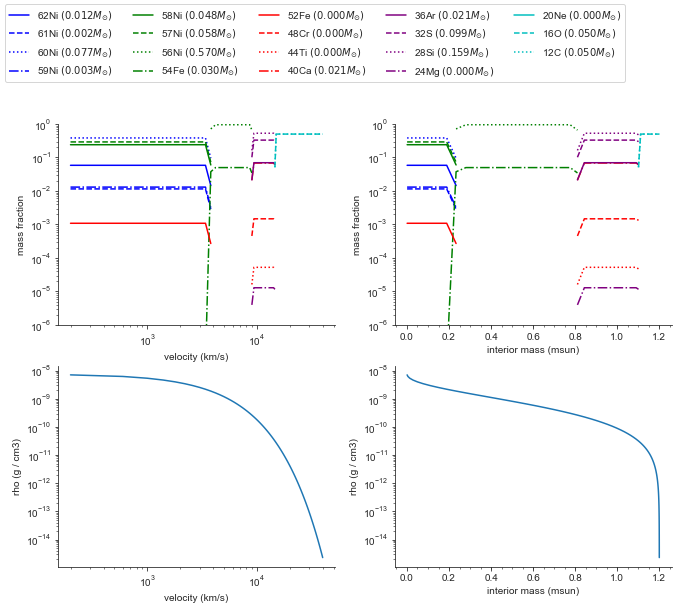

In [7]:
%pylab inline
atm.plot()

### this atmosphere is unrealistically stratified. to fix this we can add some mixing. there are several mixing options available. a convenient one is to slide a boxcar average over the atmosphere many times:

In [8]:
mixer = simple.BoxcarMixer(0.02)  # the window size is 0.02 solar masses in lagrangian space, and we do 50 reps

In [9]:
mixedatm = mixer(atm)

(<matplotlib.figure.Figure at 0x11b1165f8>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b3d4780>,
       dtype=object))

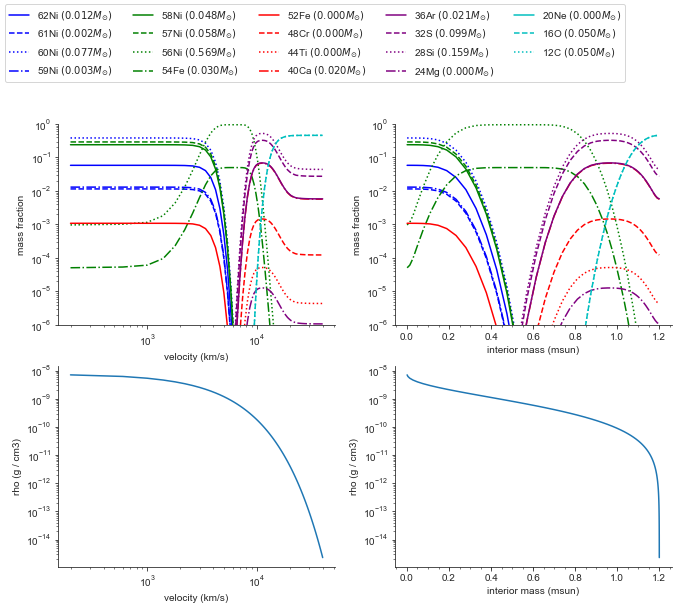

In [11]:
mixedatm.plot()

## if we want, we can also add in thermal energy with a specific profile

In [16]:
# now we can make our atmosphere, with 1e50 ergs of thermal energy following the same profile as the mass
atm = simple.StratifiedAtmosphere(layers, layermasses, profile, thermal_energy=1e50, thermal_profile=profile)
atm = mixer(atm)

/anaconda2/envs/skyportal/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


(<matplotlib.figure.Figure at 0x11be62da0>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10844ab70>,
       dtype=object))

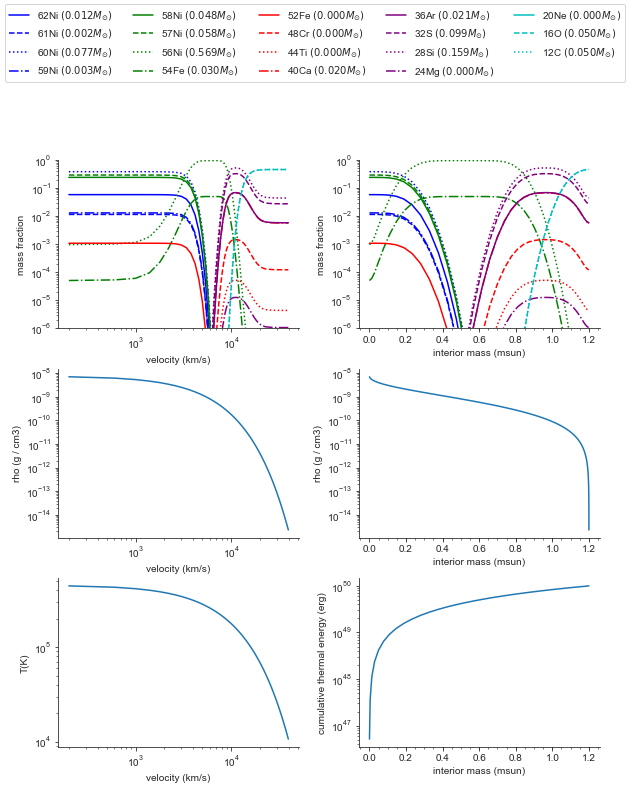

In [17]:
atm.plot(thermal=True)

## but real SN Ia atmospheres have negligible thermal energy so we will ignore the above, remake the old atmosphere that was at absolute zero and write it out to a sedona readable format.

In [18]:
# now we can make our atmosphere
atm = simple.StratifiedAtmosphere(layers, layermasses, profile)
atm = mixer(atm)

In [19]:
atm.write('model.in')

## now we have a runnable sedona model in ascii format !!

In [20]:
!cat model.in

1D_sphere SNR
100 0.000000 86400.000000 21
6.12 8.16 10.20 12.24 14.28 16.32 18.36 20.40 22.44 24.48 26.52 26.54 26.56 27.56 28.56 28.57 28.58 28.59 28.60 28.61 28.62
4.000000e+07 7.121438e-09 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.086935e-03 5.113748e-05 0.000000e+00 0.000000e+00 9.700627e-04 2.912563e-01 2.406747e-01 1.306005e-02 3.829383e-01 1.153151e-02 5.843104e-02
8.000000e+07 6.257642e-09 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.086879e-03 5.372906e-05 0.000000e+00 0.000000e+00 1.019303e-03 2.912411e-01 2.406622e-01 1.305937e-02 3.829184e-01 1.153092e-02 5.842801e-02
1.200000e+08 5.412849e-09 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.086717e-03 6.119199e-05 0.000000e+00 0